In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
laptop_data = pd.read_csv(r"D:\Projecta_for_SLA\ML -Projects\Datasets\Laptop Price Prediction\laptop_data.csv")
laptop_data.head()
#laptop_data.info()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
laptop_data = laptop_data.drop('Unnamed: 0',axis=1)

In [4]:
Company_lit = laptop_data['Company'].unique()
Company_dict = {Company_lit[i]:i for i in range(len(Company_lit))}
laptop_data['Company'] = laptop_data['Company'].replace(Company_dict)

In [5]:
Cpu_list = laptop_data['Cpu'].unique()
Cpu_dict = {Cpu_list[i]:i for i in range(len(Cpu_list))}
laptop_data['Cpu'] = laptop_data['Cpu'].replace(Cpu_dict)

In [6]:
TypeName_list = laptop_data['TypeName'].unique()
TypeName_dict = {TypeName_list[i]:i for i in range(len(TypeName_list))}
laptop_data['TypeName'] = laptop_data['TypeName'].replace(TypeName_dict)

In [7]:
laptop_data['ScreenResolution'].value_counts()
laptop_data['Resolution'] = laptop_data['ScreenResolution'].str[-9:]
laptop_data[['Width','Height']] = laptop_data['Resolution'].str.split(pat='x',expand=True)

In [8]:
touch_list = []
touch_list.clear()
for i in laptop_data['ScreenResolution']:
    x = lambda x : 1 if('Touchscreen' in i) else 0
    touch_list.append(x(i))
IPS_list = []
IPS_list.clear()
for i in laptop_data['ScreenResolution']:
    x = lambda x : 1 if('IPS Panel' in i) else 0
    IPS_list.append(x(i))
UHD_list = []
UHD_list.clear()
for i in laptop_data['ScreenResolution']:
    x = lambda x : 1 if('4K' in i) else 0
    UHD_list.append(x(i))
quad_list = []
quad_list.clear()
for i in laptop_data['ScreenResolution']:
    x = lambda x : 1 if('Quad HD+' in i) else 0
    quad_list.append(x(i))
FullHD_list = []
FullHD_list.clear()
for i in laptop_data['ScreenResolution']:
    x = lambda x : 1 if('Full HD' in i) else 0
    FullHD_list.append(x(i))
    
laptop_data['Touchscreen'] = touch_list
laptop_data['IPS Panel'] = IPS_list
laptop_data['4K'] = UHD_list
laptop_data['QuadHD+'] = quad_list
laptop_data['Full HD'] = FullHD_list

laptop_data=laptop_data.drop('ScreenResolution',axis=1)

In [9]:
memory_list = laptop_data['Memory'].unique()
memory_dict = {memory_list[i]:i for i in range(len(memory_list))}
laptop_data['Memory'] = laptop_data['Memory'].replace(memory_dict)

laptop_data['Ram'] = (laptop_data['Ram'].str.replace('GB','')).astype(int)

In [10]:
gpu_list = laptop_data['Gpu'].unique()
gpu_dict = {gpu_list[i]:i for i in range(len(gpu_list))}
laptop_data['Gpu'] = laptop_data['Gpu'].replace(gpu_dict)

os_list = laptop_data['OpSys'].unique()
os_dict = {os_list[i]:i for i in range(len(os_list))}
laptop_data['OpSys'] = laptop_data['OpSys'].replace(os_dict)

laptop_data['Weight'] = (laptop_data['Weight'].str.replace('kg','')).astype(float)
laptop_data = laptop_data.drop('Resolution',axis=1)

#laptop_data['Width'].unique()
laptop_data['Width'] = laptop_data['Width'].replace('D 1366','1366')
laptop_data['Width'] = laptop_data['Width'].astype(int)
laptop_data['Height'] = laptop_data['Height'].astype(int)

laptop_data  = laptop_data.rename(columns={'Company':'Brand'})

In [11]:
laptop_data.head()
#laptop_data.info()
#laptop_data.describe()

,Brand,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Width,Height,Touchscreen,IPS Panel,4K,QuadHD+,Full HD
0,0,0,13.3,0,8,0,0,0,1.37,71378.6832,2560,1600,0,1,0,0,0
1,0,0,13.3,1,8,1,1,0,1.34,47895.5232,1440,900,0,0,0,0,0
2,1,1,15.6,2,8,2,2,1,1.86,30636.0000,1920,1080,0,0,0,0,1
3,0,0,15.4,3,16,3,3,0,1.83,135195.3360,2880,1800,0,1,0,0,0
4,0,0,13.3,4,8,2,4,0,1.37,96095.8080,2560,1600,0,1,0,0,0


In [12]:
#Spilitting up data
laptop_data.isna().sum()
X = laptop_data.drop('Price',axis=1)
Y = laptop_data['Price']

xTrain,xTest,yTrain,yTest = train_test_split(X,Y,random_state=10,test_size=1/5)

In [13]:
#using linear regression
from sklearn.linear_model import LinearRegression
linear_model =LinearRegression()

In [14]:
linear_model.fit(xTrain,yTrain)

LinearRegression()

In [15]:
print(linear_model.score(xTrain,yTrain))
print(linear_model.score(xTest,yTest))

0.6536875052751561
0.6953249688292091


In [16]:
#Linear regressionfailed to get better result

In [17]:
# Using decission Tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=10,min_samples_leaf=9)

In [18]:
tree_model.fit(xTrain,yTrain)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=9)

In [19]:
tree_model.score(xTrain,yTrain)

0.8090231827841919

In [20]:
tree_model.score(xTest,yTest)

0.798355784058656

In [21]:
#using random forest regressor
from sklearn.ensemble import RandomForestRegressor
ensemble_model = RandomForestRegressor(max_depth=10,min_samples_leaf=9)

In [22]:
ensemble_model.fit(xTrain,yTrain)

RandomForestRegressor(max_depth=10, min_samples_leaf=9)

In [23]:
print(ensemble_model.score(xTrain,yTrain))
print(ensemble_model.score(xTest,yTest))

0.8192160905389101
0.799864638260916


<AxesSubplot:xlabel='Cpu'>

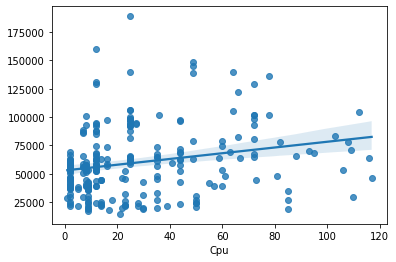

In [24]:
# polotting datas
#Linearregression
linear_y_predict = linear_model.predict(xTest)
sns.regplot(data=laptop_data,x=xTest.iloc[:,3],y=linear_y_predict)

<AxesSubplot:xlabel='Cpu'>

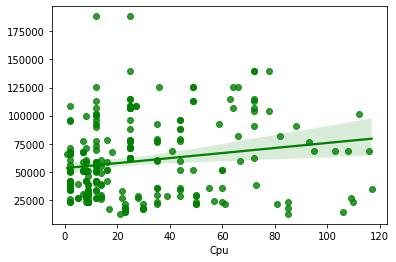

In [25]:
#decission tree regressor
tree_y_predict = tree_model.predict(xTest)
sns.regplot(data=laptop_data,x=xTest.iloc[:,3],y=tree_y_predict,color='g')

<AxesSubplot:xlabel='Cpu'>

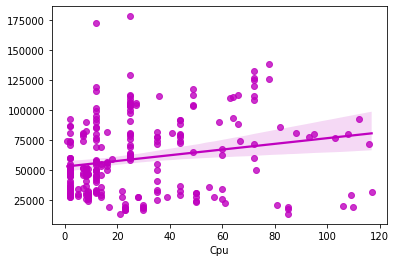

In [26]:
#random forest regressor
ensemble_y_predict = ensemble_model.predict(xTest)
sns.regplot(data=laptop_data,x=xTest.iloc[:,3],y=ensemble_y_predict,color='m')

<AxesSubplot:xlabel='Price', ylabel='Density'>

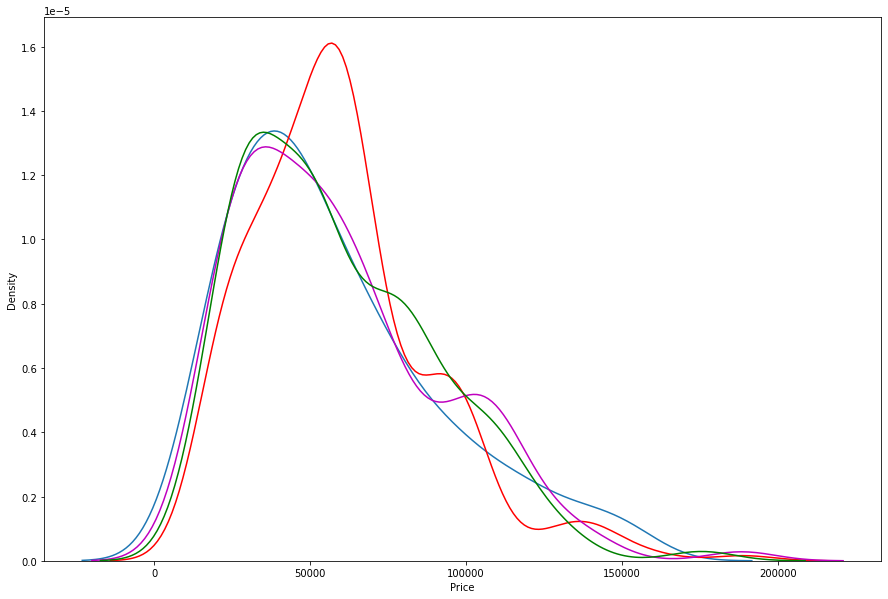

In [28]:
import warnings
warnings.filterwarnings('ignore')
fig,axs = plt.subplots(figsize=(15,10))
sns.distplot(yTest,hist=False)
sns.distplot(linear_y_predict,hist=False,color='r',)
sns.distplot(tree_y_predict,hist=False,color='m',)
sns.distplot(ensemble_y_predict,hist=False,color='g')